In [16]:
import numpy as np

from random import random, seed

#

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

from matplotlib import cm

from matplotlib.ticker import LinearLocator, FormatStrFormatter





#   /////// Functions   /////// 

def Frankefunction(x, y):

    term1   =   0.75  *np.exp(    -0.25*(9*x - 2)**2  -   0.25*(9*y - 2)**2   )

    term2   =   0.75  *np.exp(    -(9*x + 1)**2/49.   -   0.1*(9*y - 1)       )

    term3   =   0.5   *np.exp(    -0.25*(9*x - 7)**2  -   0.25*(9*y - 3)**2   )

    term4   =  -0.2   *np.exp(    -(9*x - 4)**2       -   (9*y - 7)**2        )

    return term1 + term2 + term3 + term4



def Designmatrix(x, y, n=5):

    """ 

    create a design matrix dependent on the polynomial grade you want, with a base of 3.

    want the collumns of X to be [1, x, y, x^2, xy, y^2, x^3, x^2y, xy^2, y^3]

    and so on. 

    """

    if len(x.shape) > 1:

        x = np.ravel(x)

        y = np.ravel(y)



    N = len(x)

    l = int( (n+1)*(n+2)/2 )    # nr. of elements in beta

    X = np.ones((N,l))



    for i in range(1, n+1):

        q = int( (i)*(i+1)/2 )

        for k in range(i+1):

            X[:, q+k] = x**(i-k) * y**k

    

    return X



def confidence(beta, confidence=1.96):

    weight = confidence*np.var(beta)

    betamin = beta - weight

    betamax = beta + weight

    return betamin, betamax



def Rsquared(y, y_pred):

    return 1 - ( np.sum( (y - y_pred)**2 )/np.sum( (y - np.mean(y))**2 ) )

#   ///////     /////// 

#   ///////   make random data   ///////   

nrow = 100

ncol = 200

rand_row        =       np.random.uniform(0, 1, size=nrow)

rand_col        =       np.random.uniform(0, 1, size=ncol)



sortrowindex    =       np.argsort(rand_row)

sortcolindex    =       np.argsort(rand_col)



rowsort         =       rand_row[sortrowindex]

colsort         =       rand_col[sortcolindex]



colmat, rowmat  =       np.meshgrid(colsort, rowsort)



noiseSTR        =       .05

noise           =       np.random.randn(nrow, ncol)



zmat            =       Frankefunction(rowmat, colmat) + noiseSTR*noise

#   ///////     /////// 



#   ///////   flatten   ///////   

rowarr          =       rowmat.ravel()

colarr          =       colmat.ravel()

zarr            =       zmat.ravel()

#   ///////     /////// 



#   ///////   design matrix   ///////   

n               =       5

X               =       Designmatrix(rowarr, colarr, n)

#   ///////     /////// 

In [17]:
#   ///////    Linear regression   ///////   

beta            =       np.linalg.inv( X.T @ X ) @ X.T @ zarr

CImin, CImax    =       confidence(beta)

zarr_pred          =       X @ beta

zmat_pred     =       z_pred.reshape(nrow, ncol)

#   ///////     /////// 



#   ///////   Error   ///////   
CImin, CImax    =       confidence(beta)
MSE             =       1/len(zarr_pred) * np.linalg.norm( zarr - zarr_pred )**2
RR = Rsquared(zarr, zarr_pred)
print( "\nMSE is: ", MSE, '\nR^2 is: ', RR, '\nCI_min:\n', CImin, '\nCI_max:\n',
    CImax )
#   ///////     /////// 


MSE is:  0.00434611854909747 
R^2 is:  0.9594903693022969 
CI_min:
 [-1435.22282769 -1426.80081005 -1432.06321625 -1475.72611948
 -1450.96981903 -1443.53251965 -1374.84215739 -1391.51395883
 -1414.46778719 -1445.6914567  -1471.79666993 -1488.90041055
 -1442.27751928 -1466.49384608 -1404.73539152 -1429.68595333
 -1416.29611895 -1426.34818489 -1440.67927594 -1418.67280013
 -1452.66977836] 
CI_max:
 [1436.15532194 1444.57733958 1439.31493338 1395.65203015 1420.4083306
 1427.84562998 1496.53599224 1479.8641908  1456.91036244 1425.68669292
 1399.5814797  1382.47773908 1429.10063035 1404.88430355 1466.64275811
 1441.6921963  1455.08203068 1445.02996474 1430.69887369 1452.7053495
 1418.70837127]


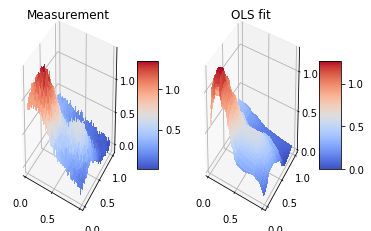

In [18]:

#   ///////   Plot   ///////   

fig = plt.figure()



ax      =   fig.add_subplot(1, 2, 1, projection='3d')

surf    =   ax.plot_surface(

            rowmat, colmat, zmat, cmap=cm.coolwarm, linewidth=0, antialiased=False   )

fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.title('Franke')

plt.title('Measurement')



ax      =   fig.add_subplot(1, 2, 2, projection='3d')

surf    =   ax.plot_surface(

            rowmat, colmat, z_pred_plot, cmap=cm.coolwarm, linewidth=0, antialiased=False   )

fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.title('Fitted Franke')

plt.title('OLS fit')



plt.show()

#   ///////     /////// 

part b)
perform resampling - split into training and test data
    own function OR scikit learn "train_test_split"
2/3 or 4/5 train/test split as rule of thumb

    o implement k-fold cross-validation algorithm (own code)
    o evaluate MSE from test data 
    o may want to compare own code with scikit-learn
 


In [20]:
from sklearn.model_selection import train_test_split

# ///// train/test split ////////
#split = 1-k_percent
train, test = train_test_split(zarr, train_size=0.66)
xtrain, xtest, ztrain, ztest, ... = train_test_split(X, z, ..., train_size=0.8)
print('train: \n', train, '\ntest:\n', test)

SyntaxError: can't assign to Ellipsis (<ipython-input-20-723c1b7b43d6>, line 6)